# Decision Tree

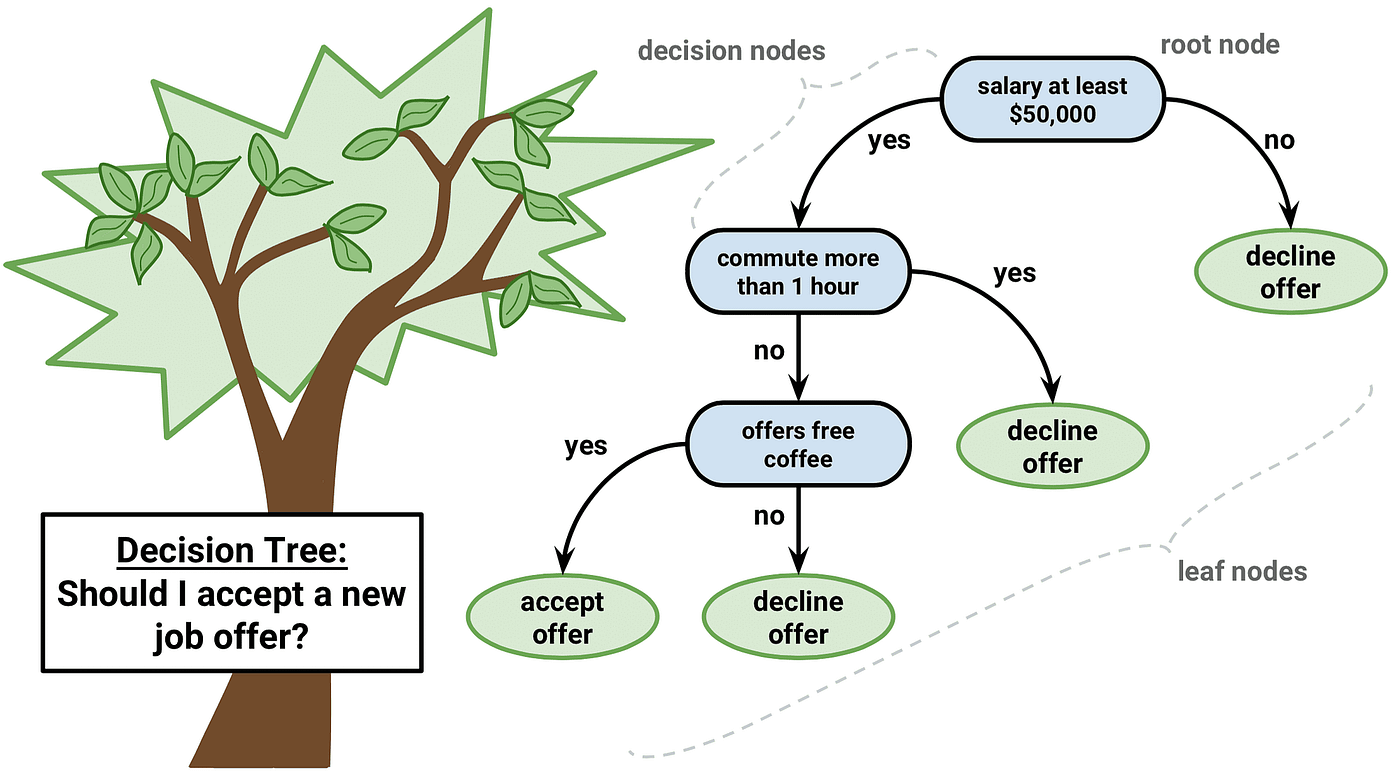

In [ ]:
# Step - 1 ( Import libraries )
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

https://drive.google.com/file/d/1C9AuqmgFeh6V67At3347Qspi4BrHU2cJ/view?usp=sharing

In [ ]:
# Step - 2 ( Data Loading )

df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# age = It is the age of patient
# sex = It is Gender of the patient ( 0 for female , 1 for male )
# cp = Chest pain of patient ( 1 level , 2 level )
# trestbps = Blood pressure in resting condition
# chol = cholesterol level at admission at hospital
# fbs = Fasting blood sugar level
# restecg = ECG ( Electrocardio graphy ) level at resting
# thalach = Maximm heart rate achieved during the test
# exang =  Exercise Induced angina  ( Facing any discomfor or not)
# oldpeak = How much ECG changes dusring exercise as compared to rest
# slope = Slope of ECG or ST changes
# ca ( coronary artery ) = The number of major blood vessels ( 0-3)  colored by fluoroscopy
# thal ( thalassemia) = A blood disorder that can damage your heart

# target = whether a patient is having heart disease or not , 1 for Yes , 0 for No

In [ ]:
# Step - 3 ( EDA )

df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Check for null /missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Check for duplicate values
print(df.duplicated().sum())

1


In [ ]:
df.drop_duplicates(inplace = True)  # inplace = True to make permanent changes in df

In [ ]:
# Check for duplicate values
print(df.duplicated().sum())

0


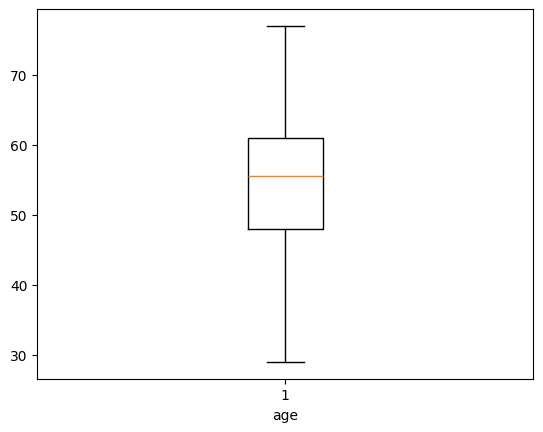

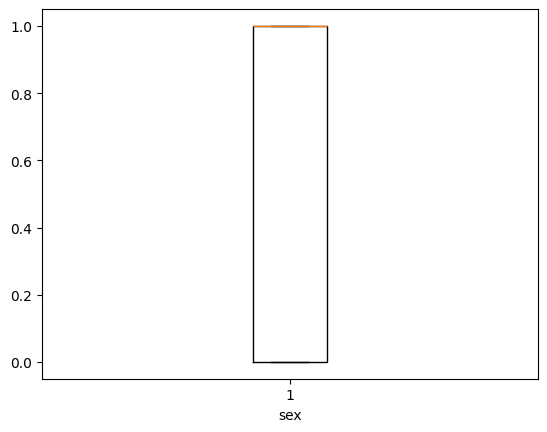

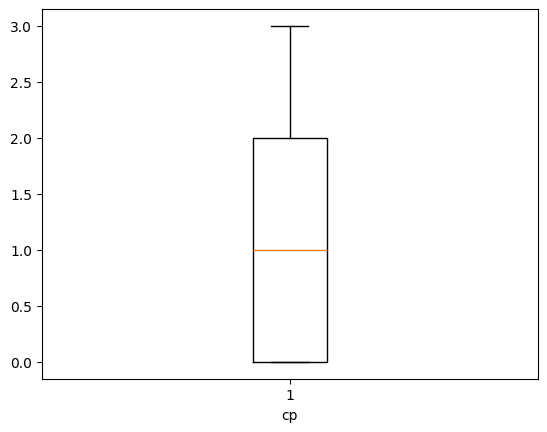

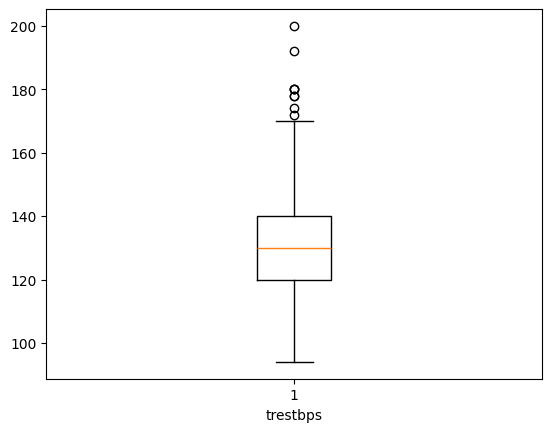

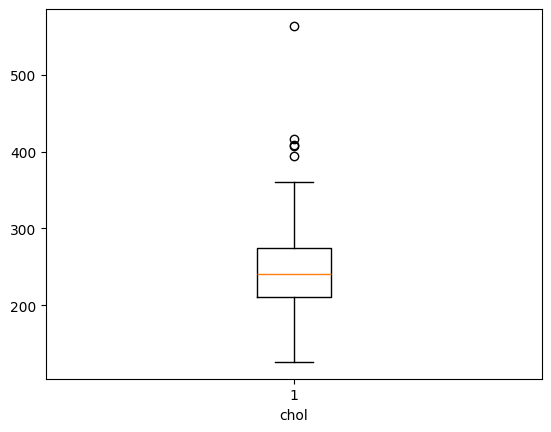

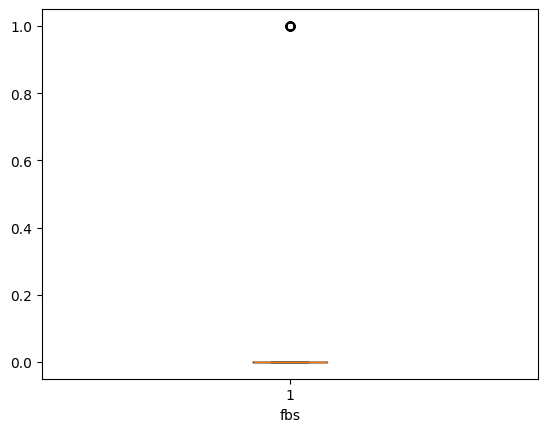

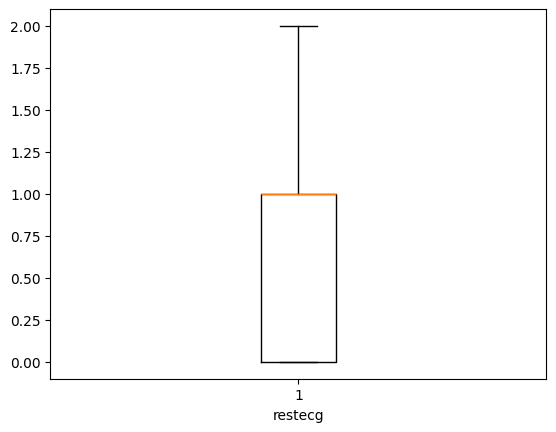

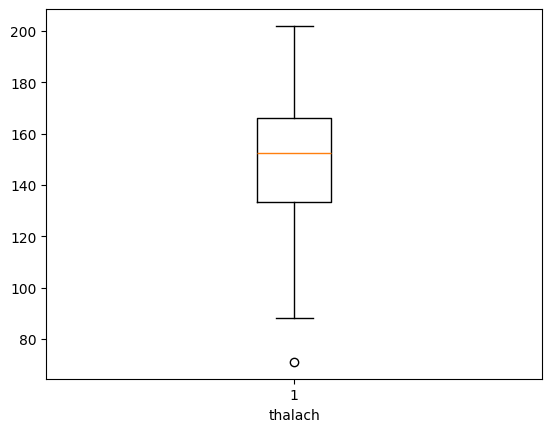

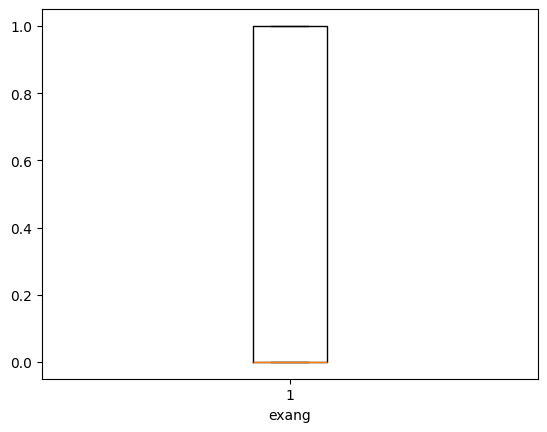

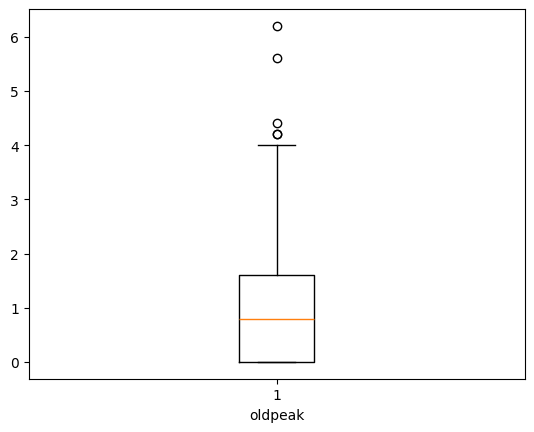

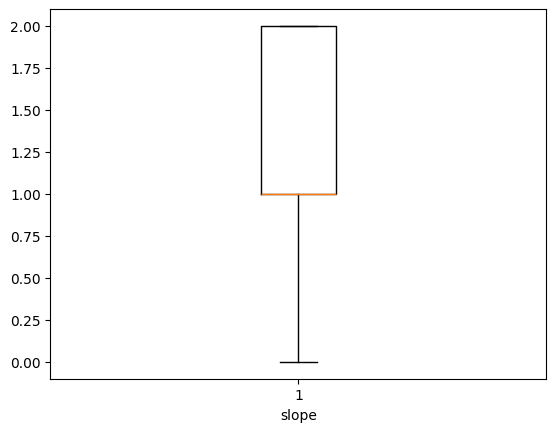

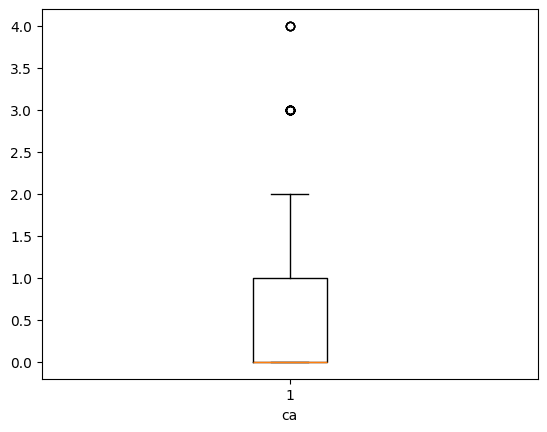

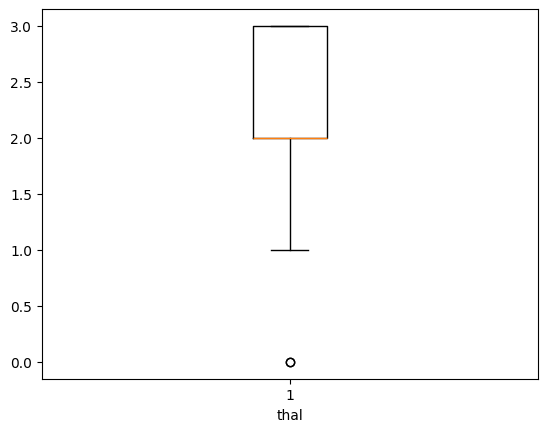

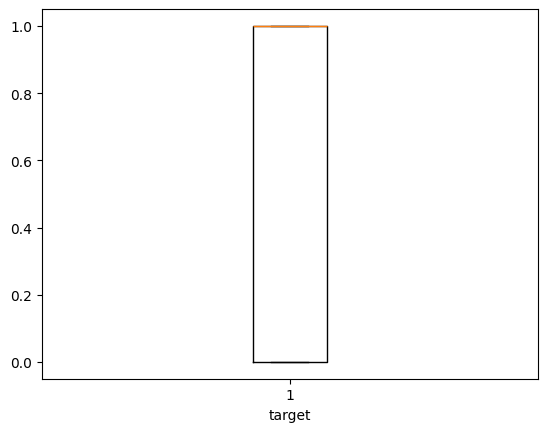

In [ ]:
# Check for outliers
for i in df.columns :
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Step - 4 ( Data Preprossing )

# NOT REQUIRED HERE AS THE DATA IS READY FOR MODEL BUILDING

In [ ]:
# Step - 5 ( Model Building )

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns = 'target') # Independent columns
y = df['target'] # Dependent column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42 )
# random_state = 60 is used to suffle the data , any value you can pass as every value will have a pattern of random suffeling

In [ ]:
model1 = DecisionTreeClassifier()

# Train the model
model1.fit(X_train , y_train)    # .fit  vs  .fit_transform ?   =  .fit for model training and .fit_transform for label encdoding

# Ask model for making predictions
y_pred = model1.predict( X_test )

In [ ]:
# Step - 6 ( Evaluate the performance of model )

# Compare the actual value vs predicted value
print("Accuracy score of the model is :", accuracy_score(y_pred , y_test)*100)

Accuracy score of the model is : 78.68852459016394


[Text(0.5663265306122449, 0.9583333333333334, 'x[12] <= 2.5\ngini = 0.495\nsamples = 241\nvalue = [109, 132]'),
 Text(0.32142857142857145, 0.875, 'x[11] <= 0.5\ngini = 0.382\nsamples = 148\nvalue = [38, 110]'),
 Text(0.44387755102040816, 0.9166666666666667, 'True  '),
 Text(0.20408163265306123, 0.7916666666666666, 'x[9] <= 1.7\ngini = 0.208\nsamples = 102\nvalue = [12, 90]'),
 Text(0.12244897959183673, 0.7083333333333334, 'x[0] <= 58.5\ngini = 0.139\nsamples = 93\nvalue = [7, 86]'),
 Text(0.061224489795918366, 0.625, 'x[3] <= 109.0\ngini = 0.028\nsamples = 71\nvalue = [1, 70]'),
 Text(0.04081632653061224, 0.5416666666666666, 'x[1] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.02040816326530612, 0.4583333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.061224489795918366, 0.4583333333333333, 'x[7] <= 147.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.04081632653061224, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08163265306122448, 0.375

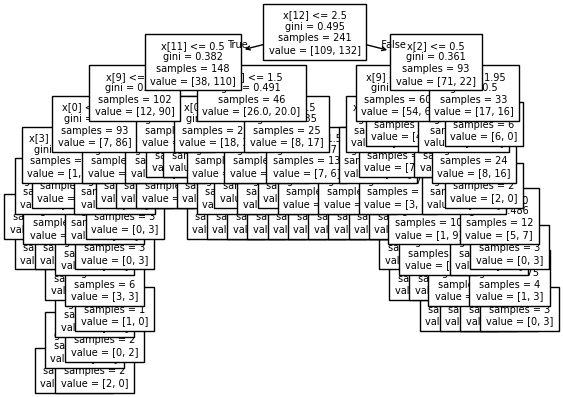

In [ ]:
# Visualize the Tree
from sklearn import tree
tree.plot_tree(model1 , fontsize=7)

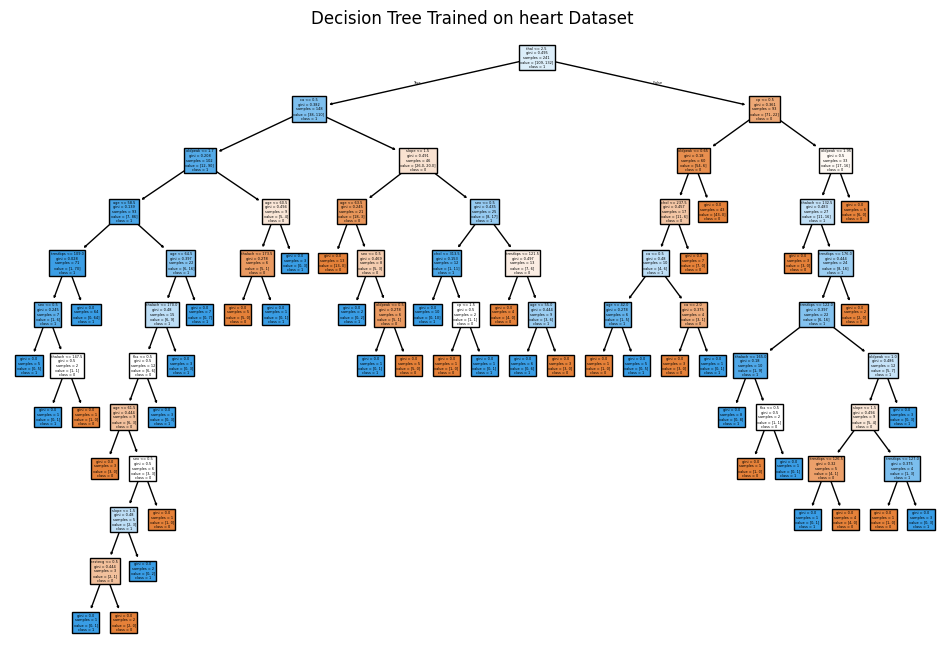

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,8))
class_names = sorted(y.unique().astype(str).tolist())
tree.plot_tree(model1, filled=True, feature_names=X.columns.tolist(), class_names=class_names)
plt.title("Decision Tree Trained on heart Dataset ")
plt.show()

In [ ]:
# How to find the random_state value that will give me the best accuracy score
list1 = [1,5,10,42,60,100,200,250,30000000]
for i in list1:
  X = df.drop(columns = 'target') # Independent columns
  y = df['target'] # Dependent column
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = i )
  model1 = DecisionTreeClassifier()
  model1.fit(X_train , y_train)
  y_pred = model1.predict( X_test )
  print("Accuracy score of the model with random_state:", i , "is : ", accuracy_score(y_pred , y_test)*100)